28.0 16.8 0.048795003647426644 -0.026190476190476198


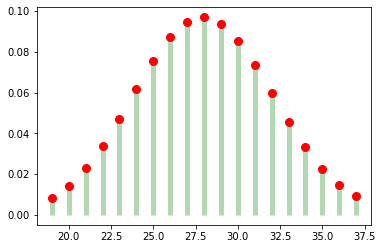

random variable	 [32 24 32 27 25 35 33 32 28 28]


In [1]:
import scipy.stats as spt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Binomial distribution

fig, ax = plt.subplots(1, 1)
n=70; p=0.4;
m,var,skw,kur=spt.binom.stats(n,p,moments='mvsk')
print(m,var,skw,kur)
x = np.arange(spt.binom.ppf(0.01, n, p),spt.binom.ppf(0.99, n, p))
ax.plot(x, spt.binom.pmf(x, n, p), 'ro', ms=8, label='binomial pmf')
ax.vlines(x, 0, spt.binom.pmf(x, n, p), colors='g', lw=5, alpha=0.3)
plt.show()
rv=spt.binom.rvs(n,p,size=10)
print('random variable\t',rv)

0.6 0.6 1.2909944487358056 1.6666666666666667


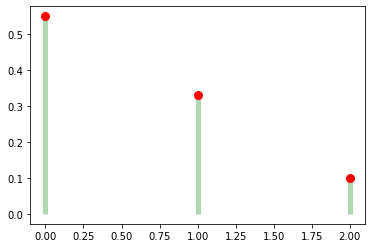

random variable	 [0 1 0 1 0 0 0 1 0 2]


In [3]:
# Poisson distribution

fig, ax = plt.subplots(1, 1)
mu = 0.6
m,var,skw,kur = spt.poisson.stats(mu,moments='mvsk')
print(m,var,skw,kur)
x = np.arange(spt.poisson.ppf(0.01, mu),spt.poisson.ppf(0.99, mu))
ax.plot(x, spt.poisson.pmf(x, mu), 'ro', ms=8, label='poisson pmf')
ax.vlines(x, 0, spt.poisson.pmf(x, mu), colors='g', lw=5, alpha=0.3)
plt.show()
rv=spt.poisson.rvs(mu,size=10)
print('random variable\t',rv)

0.5 0.08333333333333333 0.0 -1.2


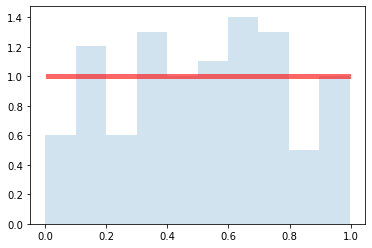

In [4]:
# Uniform distribution

fig, ax = plt.subplots(1, 1)
m, var, skw, kur = spt.uniform.stats(moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.uniform.ppf(0.01),spt.uniform.ppf(0.99), 100)
ax.plot(x, spt.uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
rv = spt.uniform.rvs(size=100)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

1.0 1.0 2.0 6.0


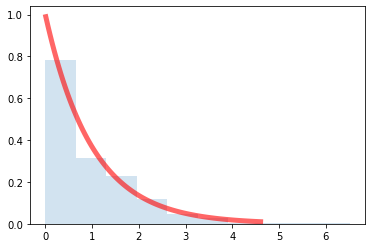

In [5]:
fig, ax = plt.subplots(1, 1)
m, var, skw, kur = spt.expon.stats(moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.expon.ppf(0.01),spt.expon.ppf(0.99), 100)
ax.plot(x, spt.expon.pdf(x),'r-', lw=5, alpha=0.6, label='exponential pdf')
rv = spt.expon.rvs(size=300)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

5.0 4.0 0.0 0.0


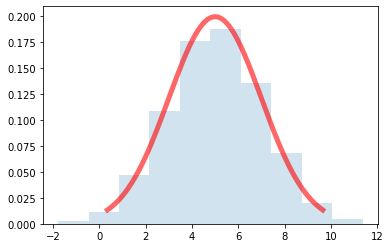

In [6]:
# Normal distribution

fig, ax = plt.subplots(1, 1)
m, var, skw, kur = spt.norm.stats(loc=5,scale=2,moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.norm.ppf(0.01,loc=5,scale=2),spt.norm.ppf(0.99,loc=5,scale=2), 1000)
ax.plot(x, spt.norm.pdf(x,loc=5,scale=2),'r-', lw=5, alpha=0.6, label='normal pdf')
rv = spt.norm.rvs(loc=5,scale=2,size=3000)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

5.0 10.0 1.2649110640673518 2.4


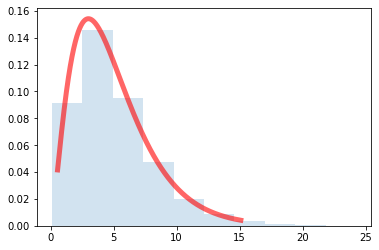

In [7]:
# Chi-squared distribution

fig, ax = plt.subplots(1, 1)
df = 5
m, var, skw, kur = spt.chi2.stats(df, moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.chi2.ppf(0.01, df),spt.chi2.ppf(0.99, df), 1000)
ax.plot(x, spt.chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi-squared pdf')
rv = spt.chi2.rvs(df, size=10000)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

0.0 3.0 nan inf


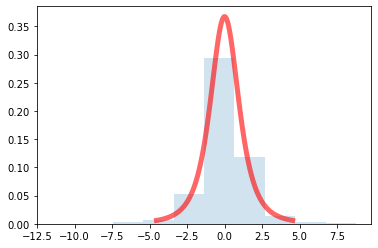

In [8]:
# student's t distribution

fig, ax = plt.subplots(1, 1)
df = 3
m, var, skw, kur = spt.t.stats(df, moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.t.ppf(0.01, df),spt.t.ppf(0.99, df), 100)
ax.plot(x, spt.t.pdf(x, df),'r-', lw=5, alpha=0.6, label='student''s t pdf')
rv = spt.t.rvs(df, size=3000)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

1.125 0.2805572660098522 1.8065676503195025 7.074636015325671


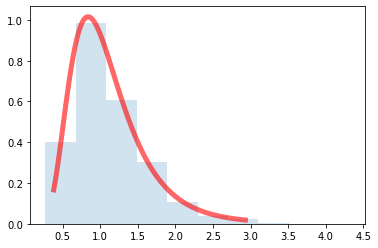

In [9]:
# F distribution

fig, ax = plt.subplots(1, 1)
dfn, dfd = 29, 18
m, var, skw, kur = spt.f.stats(dfn, dfd, moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.f.ppf(0.01, dfn, dfd),spt.f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, spt.f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='F pdf')
rv = spt.f.rvs(dfn, dfd, size=2000)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

In [10]:
# 단일 모집단 검정
import rpy2.robjects as robjs

rng = np.random.default_rng()
rvs = spt.norm.rvs(loc=5, scale=10, size=(50, 1), random_state=rng)
ss=spt.ttest_1samp(rvs, 5.0)
print(ss)
print(spt.ttest_1samp(rvs, 0.0))

robjs.r['load']("class3.RData")
ex1=robjs.r['exa10_9']

tt=spt.ttest_1samp(ex1,np.mean(ex1))

ModuleNotFoundError: No module named 'rpy2'

In [11]:
# 카이제곱 검정 (적합도)

print(spt.chisquare([16, 18, 16, 14, 12, 12]))

print(spt.chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8]))

print(spt.chisquare([16, 18, 16, 14, 12, 12], ddof=[0,1,2]))

obs=np.array([31,26,22,18,13,10])
print(spt.chisquare(obs))

# 교차분석

ss=robjs.r['exa12_5']
print(ss)

ch2,pval,df,evl=spt.chi2_contingency(observed=ss)

print('chi2 value is ',ch2,'\np-value is ',pval,'\ndegree of freedom is ',df,'\nexpected values are \n',evl)

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)
Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)
Power_divergenceResult(statistic=2.0, pvalue=array([0.84914504, 0.73575888, 0.5724067 ]))
Power_divergenceResult(statistic=15.7, pvalue=0.007754884452437289)


NameError: name 'robjs' is not defined

일원 ANOVA 분석. 스케일링을 맞춰주면 다른 결과가 나올 수 있지만. 

현상이 있으면 요인은 여러개가 있을 테니 일원 아노바분석은 생각보다 많이 쓰이지 않는다.

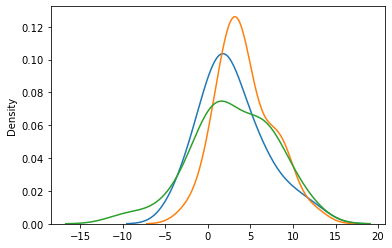

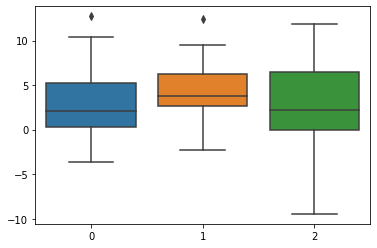

F_onewayResult(statistic=1.171534108991306, pvalue=0.31473131164363166)


NameError: name 'robjs' is not defined

In [2]:
# One way ANOVA

np.random.seed(5)

grp1=np.random.normal(3,4,30)
grp2=np.random.normal(3.1,4.1,30)
grp3=np.random.normal(2.84,4.3,30)

grp=[grp1,grp2,grp3]

import seaborn as sb

sb.kdeplot(grp1)
sb.kdeplot(grp2)
sb.kdeplot(grp3)
plt.show()

sb.boxplot(data=grp)
plt.show()

print(spt.f_oneway(grp1,grp2,grp3)) # f_oneway 두개일땐 t-test, 3개이상일때 f-test.
F_stat,pval=spt.f_oneway(*grp) #

ttt=robjs.r['exa13_6'] #r에 있는 객체를 가져오는 거고. 생략할 것.

print(spt.f_oneway(ttt[0],ttt[1],ttt[2]))